Энергодисперсионная рентгеновская флуоресценция (EDXRF) была использована для определения химического состава тела селадона и глазури в печи Лонгкуан (в уезде Даяо) и печи Цзиндэчжэнь. Для исследования сырья и технологии обжига были отобраны 40 типичных черепков четырех культурных эпох. Мы надеемся определить химические элементы, которые являются наиболее сильными объясняющими переменными для классификации образцов по различным культурным эпохам и печам.

Ceramic.Name: название типов керамики из Лунцюаня и Цзинджэчжэня

Часть: бинарная категориальная переменная ("тело" или "глазурь")

Na2O: процентное содержание Na2O (масс. %)

MgO: процентное содержание MgO (масс. %)

Al2O3: процентное содержание AI2O3 (масс. %)

SiO2: процентное содержание SiO2 (масс. %)

K2O: процентное содержание K2O (масс. %)

CaO: процентное содержание CaO (масс. %)

TiO2: процентное содержание TiO2 (масс. %)

Fe2O3: процентное содержание Fe2O3 (масс. %)

MnO: процентное содержание MnO (ppm)

CuO: процентное содержание CuO (ppm)

ZnO: процентное содержание ZnO (ppm)

PbO2: процентное содержание PbO2 (ppm)

Rb2O: процентное содержание Rb2O (ppm)

SrO: процентное содержание SrO (ppm)

Y2O3: процентное содержание Y2O3 (ppm)

ZrO2: процентное содержание ZrO2 (ppm)

P2O5: процентное содержание P2O5 (ppm)


## Проанализовать предметную область и выбрать метрику оценки качества кластеризации

## Отобрать признаки

## Реализовать алгоритмы k-menas++ и DBSCAN

## Проверить качество кластеризации по выбранной метрике

K-means++ — это интеллектуальный метод инициализации центроида для алгоритма K-mean. Цель состоит в том, чтобы распределить начальный центроид, назначив первый центроид случайным образом, а затем выбрав остальные центроиды на основе максимального квадрата расстояния. Идея состоит в том, чтобы отодвинуть центроиды как можно дальше друг от друга.

In [21]:
import pandas as pd
import numpy as np
import re
data = pd.read_csv("./Chemical_Composion_of_Ceramic.csv")
import matplotlib.pyplot as plt
#проверяем на null
data.isna().sum()

Ceramic Name    0
Part            0
Na2O            0
MgO             0
Al2O3           0
SiO2            0
K2O             0
CaO             0
TiO2            0
Fe2O3           0
MnO             0
CuO             0
ZnO             0
PbO2            0
Rb2O            0
SrO             0
Y2O3            0
ZrO2            0
P2O5            0
dtype: int64

In [22]:
#Приводим названия в единый формат
data["Ceramic Name"] = data["Ceramic Name"].apply(lambda x: re.sub(r"-\d+", "", x ))
print(data["Ceramic Name"].unique())
data.head(5)

['FLQ-b' 'DY-BS-b' 'DY-NS-b' 'DY-Y-b' 'DY-M-b' 'DY-QC-b' 'FLQ-g' 'DY-BS-g'
 'DY-NS-g' 'DY-Y-g' 'DY-M-g' 'DY-QC-g']


,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [23]:
data.corr()
#Al2O3 corr CaO == -0.843
#CaO corr Rb2O == -0.704
#SrO corr Rb2O == -0.77   # Не пофикшено, пока с ним попробуем
#P2O5 corr SrO=  -0.746 
#P2O5 corr CaO=  -0.908
#P2O5 corr Al2O3 =  - 0.767
# Al2O3 corr Part
#del P2O5 and  CaO

#None != 0 

# data.drop(['P2O5', 'CaO', "Part"], axis= 1 , inplace= True )
data.drop(['P2O5'], axis= 1 , inplace= True )
data.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2
0,FLQ-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80
1,FLQ-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100
2,FLQ-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80
3,FLQ-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70
4,FLQ-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80


0.375


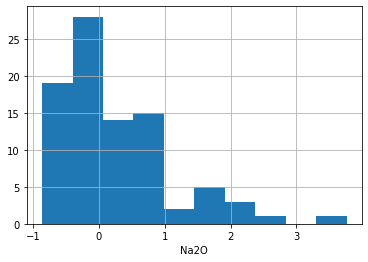

0.405


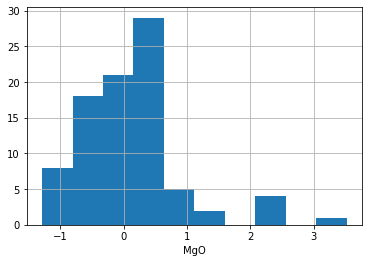

16.205


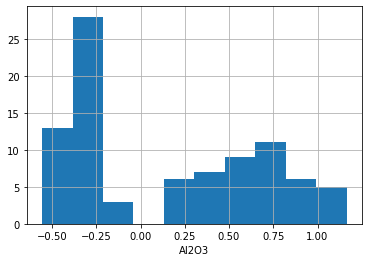

69.99000000000001


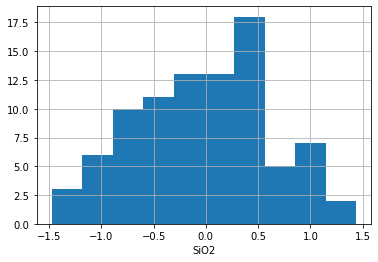

5.0649999999999995


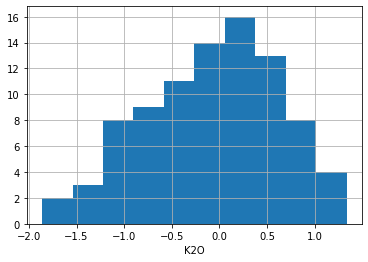

2.69


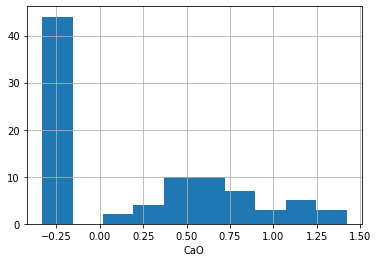

0.08


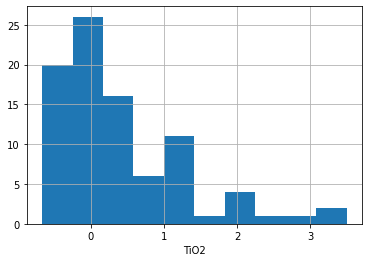

1.51


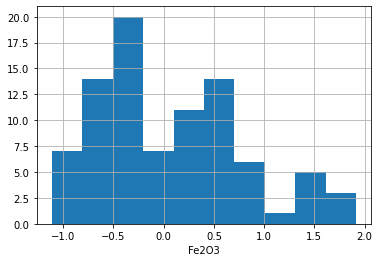

590.0


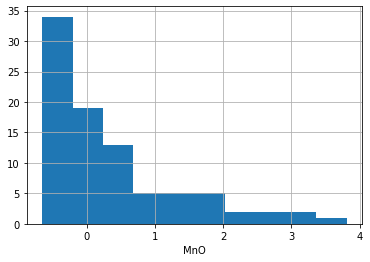

30.0


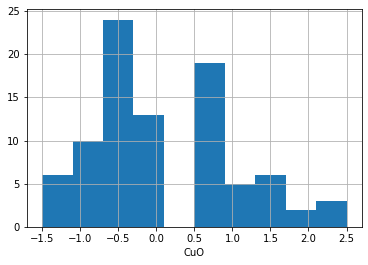

90.0


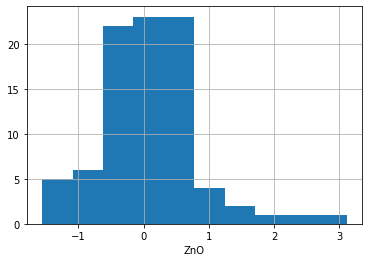

30.0


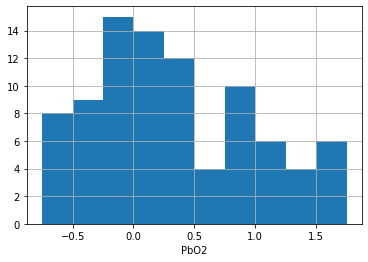

320.0


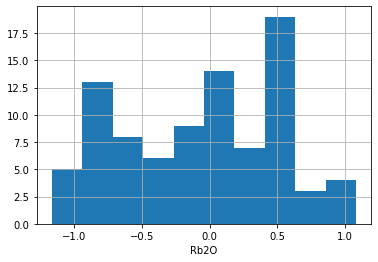

75.0


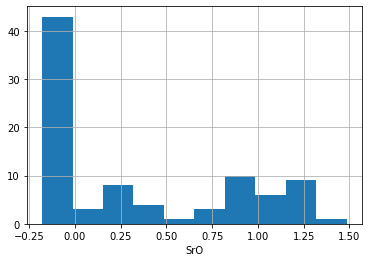

40.0


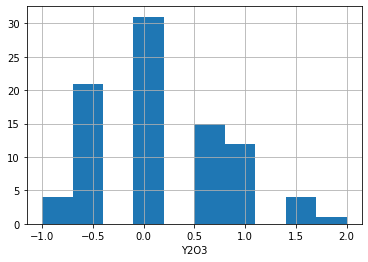

140.0


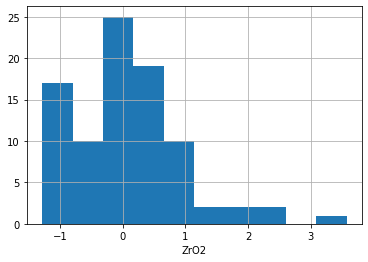

In [24]:
def find_median(column_data:pd.DataFrame) -> list[float, pd.DataFrame]:
    sort_column = column_data.sort_values()
    height = sort_column.shape[0]
    med = sort_column.iloc[height//2] if height%2 else (sort_column.iloc[height//2] + sort_column.iloc[height//2 - 1])/2
    return med, sort_column

def find_interquarter_range(column_data):
    med, sorted_column = find_median(column_data)
    print(med)
    quart_1, _ = find_median(sorted_column.iloc[: sorted_column.shape[0]//2])
    quart_3, _ = find_median(sorted_column.iloc[sorted_column.shape[0]//2 :])

    return med, quart_1, quart_3


for column in data.columns[2:]:
    med, quart1, quart3 = find_interquarter_range(data[column])
    data[column] = (data[column] - med) / (quart3 - quart1)

    data[column].hist()
    plt.xlabel(column)
    plt.show()

In [31]:
data.head(2)

,Ceramic Name,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2
0,FLQ-b,0.6125,-0.096154,0.385617,0.482509,-0.179283,-0.307692,-0.166667,-0.395210,0.064,-1.0,-0.444444,-0.50,0.916667,-0.157895,0.0,-0.857143
1,FLQ-b,0.4875,0.250000,0.564553,0.024125,-0.067729,-0.284421,0.166667,-0.467066,-0.336,-0.5,-0.222222,0.25,0.916667,-0.178947,0.0,-0.571429


In [50]:
import seaborn as sns
priznaks= data.columns[1:]
names = data["Ceramic Name"].unique()
print(names)
def show_data(data:pd.DataFrame):
    data_b = data[data["Ceramic Name"].isin(names[:6])]
    data_g = data[data["Ceramic Name"].isin(names[6:])]
    # data2=
    #Al2O3
    #CaO
    # colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

    fig, axs = plt.subplots(nrows= 40 , ncols= 3, figsize=(50, 300))
    count = -1
    for i in range(len(priznaks)-1):
        for j in range(i+1, len(priznaks)):
            count+=1
            for ind, category in enumerate(names[:6]):
                axs[count//3, count%3].scatter(priznaks[i], priznaks[j], data=data_b.loc[(data_b["Ceramic Name"] == category)], label=str(category))

            axs[count//3, count%3].set_xlabel(priznaks[i])
            axs[count//3, count%3].set_ylabel(priznaks[j])
            axs[count//3, count%3].legend()
        #print(priznaks[i], priznaks[j], count)

# sns.FacetGrid(data, hue="Ceramic Name", height=5) \
#    .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
#    .add_legend()
# plt.show()

['FLQ-b' 'DY-BS-b' 'DY-NS-b' 'DY-Y-b' 'DY-M-b' 'DY-QC-b' 'FLQ-g' 'DY-BS-g'
 'DY-NS-g' 'DY-Y-g' 'DY-M-g' 'DY-QC-g']


In [ ]:
import numpy as np
# otv_points = {str(i): lambda x, i=i: x == i for i in range(4)}
# otv_points["0"](0)

# a = []

# b = np.array([1,2,3,4])
# a+=[b]
# a

# a = np.array([[1,2,3], [-19,2,3], [3,2,3], [-1,2,3]])
# dists = np.array([[1,2,3,4], [5, 3,2,3], [5,2,4,3], [-1,5,2,3]])
# max_arg = np.argmax(dists)//dists.shape[1]
# print(max_arg)
# already_selected_inds = [max_arg]
# already_selected_inds += [np.argmax(np.delete(dists, already_selected_inds, axis=0))]
# #print(np.delete(dists, already_selected_inds, axis=0))
# print(already_selected_inds)
#print(a[max_arg//len(dists[0]),:])
# print(dists[np.random.randint(0, len(dists)), :])
# print(a.mean(axis=0))
# print(a.shape)
#print(a[np.argmin(dists, axis=1) == 0])

# #Дико прикольная фигня
# otv = {str(i):lambda x, i=i: np.argmin(x, axis=1) == i for i in range(3)}
# #a[otv["2"](a)]
# claster_points = {str(i): a[np.argmin(dists, axis=1) == i] for i in range(4)}
# print(claster_points)
# a = list(claster_points.values())
# #print(np.array([b.mean(axis=0) for b in list(claster_points.values())]))

# # np.abs(np.array([[1,2,3]]) - np.array([[100,2,3]]))
# np.random.randint(0, 100)

a = [[i, 10] for i in range(10) if i>100]
print(a)
for i in a:
    if len(a)<100:
        a += b
    
    print(a)
    print(i)


In [25]:

class K_mean_plus:
    def __init__(self, k:int):
        self.k = k
        self.delta = 0.004
        self.centroids = None

    #Переписать для kmean++
    def get_random_centroids(self, data:pd.DataFrame):
        centr = data.sample(n = self.k)
        return self.data_to_numpy(centr)

    def data_to_numpy(self, data):
        data = np.array(data, dtype=np.float64)
        return np.array([[i, point] for i, point in enumerate(data)], dtype=list)

    # TODO ПЕРЕПИСАТЬ ТАК, ЧТОБЫ СОХРАНЯТЬ ИНДЕКСЫ ТОЧЕК
    def calc_dists(self, centroids:np.array, data:np.array):
        return np.array([[[i, np.sqrt(np.sum((centroid[1] - point[1])**2))] for centroid in centroids] for i, point in enumerate(data)], dtype=np.float64)


    #можно переписать более по нампаевски Переписано
    def points_to_centroids(self, dists:np.array, points:np.array, now_k:int):
        claster_points = {str(i): points[np.argmin(dists, axis=1) == i] for i in range(now_k)}
        # claster_points = {str(i): [] for i in range(self.k)}
        # for dist in dists:
        #     argm = np.argmax(dist)
        #     claster_points[str(argm)] += [dist]
        return claster_points

    def calc_max_dist_point(self, centroids_points:dict, centroids:np.array):

        max_arg = 0
        max_point = None
        for cent_ind, clast_points in centroids_points.items():
            clast_dists = self.calc_dists(centroids=[centroids[int(cent_ind)]], data=clast_points)
            now_max_arg = np.argmax(clast_dists[:,:,1])
        
            if now_max_arg>max_arg:
                max_arg = now_max_arg
                max_point = clast_points[now_max_arg, :]
        return max_point


    def get_k_plus_plus_centroids(self, points:np.array):
        centroids= [points[np.random.randint(0, len(points)), :]]

        for i in range(self.k - 1):
            dists = self.calc_dists(centroids=centroids, data=points)
            cent_points = self.points_to_centroids(dists=dists[:,:,1], points=points, now_k=i+1)
            centroids+=[self.calc_max_dist_point(centroids_points=cent_points, centroids=centroids)]

        return np.array(centroids, dtype=list)
    
    def calc_new_centroids_pos(self, centroids_points:dict):
        # print([points.mean(axis=0) for points in list(centroids_points.values())])
        return np.array([points.mean(axis=0) for points in list(centroids_points.values())], dtype=list)

    def fit(self, data:pd.DataFrame):
        # self.centroids = self.get_random_centroids(data=data)
        num_data = self.data_to_numpy(data=data)
        self.centroids =  self.get_k_plus_plus_centroids(points = num_data)
        flag = True
        while flag:
            dists = self.calc_dists(centroids=self.centroids, data=num_data)
            cent_points = self.points_to_centroids(dists=dists[:,:,1], points=num_data, now_k=self.k)
            new_centroids = self.calc_new_centroids_pos(centroids_points = cent_points)
            print(f"all_distance is: {np.sum(np.sum(np.abs(self.centroids[:,1] - new_centroids[:,1])))}")
            if np.sum(np.sum(np.abs(self.centroids[:,1] - new_centroids[:,1]))) < self.delta:
                flag = False

            self.centroids = new_centroids

    def predict(self, X:pd.DataFrame):
        num_data = self.data_to_numpy(data=X)
        dists = self.calc_dists(centroids=self.centroids, data=num_data)
        cent_points = self.points_to_centroids(dists=dists[:,:,1], points=num_data, now_k=self.k)
        return cent_points
    
    def drow(self, claster_names:pd.DataFrame, k_means_otvs:dict, claster_unic_names:list):
        real_class = [[0 for i in range(len(claster_unic_names))] for j in range(len(k_means_otvs))]

        for k_means_claster_name, claster_points in k_means_otvs.items():
            for i, claster_u_name in enumerate(claster_unic_names):
                real_class[int(k_means_claster_name)][i] = np.sum(claster_names.iloc[claster_points[:,0]] == claster_u_name)
        real_class = np.array(real_class)
        
        klass_elems = np.sum(real_class, axis=0) # количество элементов класса
        klaster_elems = np.sum(real_class, axis=1) # Общее количество элементов в данном кластере

        bcp_matrix = real_class**2/klaster_elems[:, None]
        bcp_classes = np.sum(bcp_matrix, axis=0)/klass_elems
        bcr_matrix = real_class**2/klass_elems
        bcr_classes = np.sum(bcr_matrix, axis=0)/klass_elems
        weighted_average = (bcp_classes + bcr_classes)/2
        print(f"{real_class}")
        #Точность предсказанных точек
        print(f"bcp_classes: {bcp_classes}")
        #Полнота для предсказанных точек
        print(f"bcr_classes: {bcr_classes}")
        print(f"weighted_average: {weighted_average}")

In [127]:
import numpy as np
a = np.array([[1,2,3], [2,4,6], [3,6,9]])
b = np.array([1,2,3])
print(b[:, None])
print(((a**2).T)/(b))

[[1]
 [2]
 [3]]
[[ 1.  2.  3.]
 [ 4.  8. 12.]
 [ 9. 18. 27.]]


In [26]:
data_otv = data["Part"]
data_claster = data.drop(["Part", "Ceramic Name"], axis= 1 , inplace= False)
unic_names = data["Part"].unique()

a = K_mean_plus(k=2)
a.fit(data_claster)
otvs = a.predict(data_claster)
a.drow(claster_names = data_otv, k_means_otvs = otvs, claster_unic_names = unic_names)

all_distance is: 22.671518115107446
all_distance is: 2.4639180392040076
all_distance is: 2.4418943400893895
all_distance is: 0.5475741912939587
all_distance is: 0.8515910912052179
all_distance is: 0.9494952011707071
all_distance is: 0.8948405392897736
all_distance is: 0.8158364284900584
all_distance is: 0.7138350744003223
all_distance is: 0.0
[[43  0]
 [ 1 44]]
bcp_classes: [0.97777778 0.97777778]
bcr_classes: [0.95557851 1.        ]
weighted_average: [0.96667815 0.98888889]


# Визуализация kmeans++


In [ ]:
import numpy as np
a = np.array([[1,2],[2,4],[3,21]])
print([1,2] in a)

b = np.fromiter((x for x in a if x in [1,3]), dtype=np.float64)
print(b)
print([[1,2,3,4]])
# print(a.shape)

# for i in range(a.shape[0]):
#     if a.shape[0]<20:
#         a = np.vstack((a,a))
#     # print(a)

# a[[0,2]]

In [ ]:
import matplotlib.pyplot as plt

plt.scatter([1,2,3,4,5,6], [1,2,3,4,5,6])
plt.scatter([1,2,3,4,5,6], [1,2,3,4,5,6][::-1])

# DBSCAN


In [27]:
class DBScan:
    def __init__(self, num_neib, max_dist):
        self.num_neib = num_neib
        self.max_dist = max_dist
        self.groups = []
        self.red_flags = set()

        #Для не наивной реализации
        self.karandash = dict()
    
    
    def data_to_numpy(self, data:pd.DataFrame):
        return np.array(data, dtype=np.float64)


    def data_save_inds(self, data:np.array):
        return np.array([[i, point] for i, point in enumerate(data)], dtype=list)
    

    def del_point(self, points_to_del_ind:int):
        points_to_del_ind = np.array([points_to_del_ind]).reshape(-1)
        self.points_indexs_queue  = np.fromiter((point_ind for point_ind in self.points_indexs_queue if point_ind not in points_to_del_ind), dtype=int)


    def get_random_point(self, points_inds:np.array):
        now_ind = np.random.choice(points_inds)
        return (self.points_queue[now_ind][0], self.points_queue[now_ind][1])


    def search_neibs(self, now_point:np.array, points:np.array):
        # np.array([[point_ind, np.sqrt(np.sum((now_point - point)**2)), point] for point_ind, point in points if np.sqrt(np.sum((now_point - point)**2)) < self.max_dist], dtype=list)
        return [[point_ind, point] for point_ind, point in points if np.sqrt(np.sum((now_point - point)**2)) < self.max_dist]



    def check_group(self, neibs:list):
        #TODO Почему-то разбивает точки одного кластера на разные
        #Потому, что нампаевское объединение не прибавляет к существующему массиву, а создаёт новый
        for point_ind, neib in neibs:
            self.del_point(points_to_del_ind=point_ind)
            #посмотреть что можно сделать с point_ind и таким образлм связать его с жёлтыми индексами
            
            #добавляем соседа в любом случае, если он контачит с зелёным, не важно, жёлтый он или нет. Вот это нужно будет переписать
            #в случае создания логики основанной на расстоянии до ближайшего зелёного
            self.groups[-1] += [point_ind]
            # now_neibs = self.search_neibs(now_point=neib, points=self.points_queue[self.points_indexs_queue])
            now_neibs = self.search_neibs(now_point=neib, points=self.points_queue)
            #Если и эта точка является зелёной, то добавляем её соседей в список, который необходимо обойти
            if len(now_neibs) >= self.num_neib:
                
                #находим соседей, которые ещё не находятся в очереди на обработку
                soseds_to_add = [sosed for sosed in  now_neibs if ((sosed[0] not in np.array(neibs, dtype=list)[:,0] ) and (sosed[0] in self.points_indexs_queue))]

                if len(soseds_to_add):
                    neibs += soseds_to_add
                
            #если уже находили эту точку ранее и она оказалась в жёлтых - удаляем её оттуда.
            else:
                self.karandash.pop(str(point_ind), None)
    

    def fit(self, points:pd.DataFrame):
        self.points = self.data_to_numpy(data=points)
        self.points_queue = self.data_to_numpy(data=points)
        self.points_indexs_queue = np.arange(self.points_queue.shape[0])
        self.points_queue =self.data_save_inds(data=self.points_queue)

        while len(self.points_indexs_queue):
            
            #вот тут приколы с бесконечным выбором одного и той же жёлтой точки
            point_ind, now_point = self.get_random_point(self.points_indexs_queue)
            self.del_point(points_to_del_ind=point_ind)


            # print(point_ind, now_point)
            # print(self.points_indexs_queue)
            # neibs = self.search_neibs(now_point=now_point, points = self.points_queue[self.points_indexs_queue])
            # Реально сводит количество наблюдений к нормальному числу self.points_queue[self.points_indexs_queue]
            neibs = self.search_neibs(now_point=now_point, points = self.points_queue[self.points_indexs_queue])
            if len(neibs) < self.num_neib:
                #наивная реализация. В случае отношения точки к жёлтым флагам, она присвоится к тому кластеру, который найдёт её первым
                if len(neibs)==0:
                    self.red_flags.update([point_ind])
                else:
                    self.karandash.update({str(point_ind): now_point})

                #Скорее всего здесь не обрабатываются точки рядом с которыми что-то есть, но их меньще чем self.num_neib
            else:
                self.groups += [[point_ind]]
                self.check_group(neibs=neibs)
        
        self.red_flags.update(list(self.karandash.keys()))
        self.red_flags = [int(i) for i in self.red_flags]


    def drow(self):
        for group in self.groups:
            # print("hahahahahaaha")
            # print(self.points[group])
            # print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            plt.scatter(self.points[group][:,0], self.points[group][:,1])
        
        # print("RED FLAAAAAAG", self.red_flags)
        plt.scatter(self.points[self.red_flags][:,0], self.points[self.red_flags][:,1])
        plt.show()


    def calk_acc(self, claster_names:pd.DataFrame, claster_unic_names:list):                #+1 так как есть redflag
            real_class = [[0 for i in range(len(claster_unic_names))] for j in range(len(self.groups) +1)]

            for g_ind, group in enumerate(self.groups + [self.red_flags]):
                print(group)
                print()
                for i, claster_u_name in enumerate(claster_unic_names):
                    real_class[g_ind][i] = np.sum(claster_names.iloc[group] == claster_u_name)
            real_class = np.array(real_class)
            
            klass_elems = np.sum(real_class, axis=0) # количество элементов класса
            klaster_elems = np.sum(real_class, axis=1) # Общее количество элементов в данном кластере

            bcp_matrix = real_class**2/klaster_elems[:, None]
            bcp_classes = np.sum(bcp_matrix[:-1], axis=0)/klass_elems
            bcr_matrix = real_class**2/klass_elems
            bcr_classes = np.sum(bcr_matrix[:-1], axis=0)/klass_elems
            weighted_average = (bcp_classes + bcr_classes)/2
            # print(f"{real_class}")
            print(f"bcp_classes: {bcp_classes}")
            print(f"bcr_classes: {bcr_classes}")
            print(f"weighted_average: {weighted_average}")


  Ceramic Name  Part    Na2O       MgO     Al2O3      SiO2       K2O  \
0        FLQ-b  Body  0.6125 -0.096154  0.385617  0.482509 -0.179283   
1        FLQ-b  Body  0.4875  0.250000  0.564553  0.024125 -0.067729   
2        FLQ-b  Body  0.2875 -0.826923  0.271234  1.136309 -1.270916   

        CaO      TiO2     Fe2O3    MnO  CuO       ZnO  PbO2      Rb2O  \
0 -0.307692 -0.166667 -0.395210  0.064 -1.0 -0.444444 -0.50  0.916667   
1 -0.284421  0.166667 -0.467066 -0.336 -0.5 -0.222222  0.25  0.916667   
2 -0.292178 -0.333333 -0.526946 -0.272 -0.5 -0.888889  0.50  0.500000   

        SrO  Y2O3      ZrO2  
0 -0.157895   0.0 -0.857143  
1 -0.178947   0.0 -0.571429  
2 -0.073684   0.0 -0.857143  


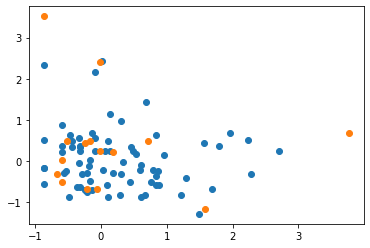

[14, 27, 29, 32, 36, 37, 38, 39, 40, 41, 43, 16, 17, 18, 19, 26, 33, 35, 20, 15, 28, 13, 25, 1, 12, 8, 21, 9, 30, 22, 0, 2, 3, 4, 5, 6, 7, 11, 46, 50, 31, 54, 44, 53, 55, 56, 85, 45, 49, 60, 64, 65, 72, 74, 75, 78, 86, 87, 59, 63, 66, 80, 83, 61, 70, 67, 69, 62, 68, 79, 84, 58, 76]

[34, 71, 73, 42, 10, 77, 47, 48, 81, 82, 51, 52, 23, 24, 57]

bcp_classes: [0.47353674 0.35990037]
bcr_classes: [0.7856405  0.59710744]
weighted_average: [0.62958862 0.47850391]


In [49]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# iris = datasets.load_iris()
# # dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range(len(iris.target))]
# # dataset
# iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])
# print(iris.shape)
# # iris.plot(kind="scatter", x='sepal length (cm)', y='sepal width (cm)')

# # sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, size=5)
# iris.head(3)
# sns.FacetGrid(iris, hue="target", height=5) \
#    .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
#    .add_legend()
# plt.show()

# iris
# a = DBScan(num_neib=3, max_dist=120)
# a.fit(points=iris[['sepal length (cm)', 'sepal width (cm)']])
# data_otv = iris["target"]
# print(data_otv)
# unic_names = iris["target"].unique()
# print(unic_names)


a = DBScan(num_neib=3, max_dist=2.36)
print(data.head(3))
data_claster = data.drop(["Ceramic Name", "Part"], axis= 1 , inplace= False)
a.fit(data_claster)
data_otv = data["Part"]
data_claster = data.drop(["Ceramic Name", "Part"], axis= 1 , inplace= False)
unic_names = data["Part"].unique()
a.drow()
a.calk_acc(claster_names=data_otv, claster_unic_names=unic_names)